In [132]:
import pandas as pd
import numpy as np

In [3]:
file_name = './total_20200709.csv'  # 读入文件
data = pd.read_csv(file_name)
data.shape

D:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (44,53,87,90,93,95,104,105,115,122,127,128,133,135,136) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(5430, 140)

In [4]:
age = (pd.to_datetime(data['admittime']).dt.year - pd.to_datetime(data['dob']).dt.year)
age

0        63
1        77
2        82
3        86
4        73
       ... 
5425     66
5426     62
5427     54
5428    307
5429     54
Length: 5430, dtype: int64

In [5]:
age[age > 89] = age[age > 89] - 211

In [6]:
age

0       63
1       77
2       82
3       86
4       73
        ..
5425    66
5426    62
5427    54
5428    96
5429    54
Length: 5430, dtype: int64

In [7]:
data['age'] = age
data.shape

(5430, 141)

In [32]:
import datetime as dt

def convert(x):
    return (pd.to_datetime(x) - np.datetime64('1970-01-01T08:00:00Z')) / np.timedelta64(1, 's')

data['flag'] = np.zeros(data.shape[0])
for i in data.iterrows():
    if i[1]['expire_flag'] == 1:
        if (convert(i[1]['dod']) - convert(i[1]['admittime'])) < 182 * 24 * 3600:
            data.loc[i[0], 'flag'] = 1

<ipython-input-32-d4783b0cf246>:4: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  return (pd.to_datetime(x) - np.datetime64('1970-01-01T08:00:00Z')) / np.timedelta64(1, 's')


In [33]:
data['flag'][data['flag'] == 1].count()

1401

In [34]:
file_name = './total_notes_20200709.csv'
data.to_csv(file_name)

In [35]:
data.tail(5)

,hadm_id,hadm_id.1,subject_id,admittime,dischtime,deathtime,discharge_location,religion,marital_status,ethnicity,...,50903,50904,50905,50907,51000,50927,50906,50945,age,flag
5425,195101,195101,56045,2152-02-06 10:36:00,2152-02-18 14:50:00,NaN,REHAB/DISTINCT PART HOSP,OTHER,MARRIED,WHITE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,0.0
5426,152438,152438,16652,2134-06-25 10:00:00,2134-06-28 19:10:00,NaN,HOME HEALTH CARE,UNOBTAINABLE,MARRIED,WHITE,...,3.0,54,75.0,161,162,NaN,NaN,NaN,62,0.0
5427,153663,153663,14723,2178-06-09 14:12:00,2178-07-14 03:50:00,2178-07-14 03:50:00,DEAD/EXPIRED,CATHOLIC,SINGLE,WHITE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,1.0
5428,175730,175730,17041,2178-03-21 12:32:00,2178-03-29 16:00:00,NaN,HOME HEALTH CARE,CATHOLIC,MARRIED,WHITE,...,4.2,25,43.0,104,180,NaN,50,NaN,96,0.0
5429,104923,104923,8942,2178-08-29 13:47:00,2178-09-07 14:56:00,NaN,HOME,CATHOLIC,MARRIED,WHITE,...,3.2,43,80.0,139,80,NaN,NaN,NaN,54,0.0


In [36]:
data.isnull()

,hadm_id,hadm_id.1,subject_id,admittime,dischtime,deathtime,discharge_location,religion,marital_status,ethnicity,...,50903,50904,50905,50907,51000,50927,50906,50945,age,flag
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
5426,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
5427,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
5428,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [37]:
data.iloc[0, :]

hadm_id                    127444
hadm_id.1                  127444
subject_id                   3498
admittime     2103-12-01 20:39:00
dischtime     2103-12-04 15:25:00
                     ...         
50927                         NaN
50906                         NaN
50945                         NaN
age                            63
flag                            0
Name: 0, Length: 142, dtype: object

In [38]:
nan_row = []   #找到null值大于100的行
for i in data.index:
    row = data.iloc[i,:].isnull().sum()
    if row > 100:
        nan_row.append(i)
print(len(nan_row))

110


In [39]:
data_100 = data.drop(labels=nan_row)
data_100.shape

(5320, 142)

In [40]:
file_name_100 = './total_20200709_100.csv'
data_100.to_csv(file_name_100)

In [41]:
data_100.columns

Index(['hadm_id', 'hadm_id.1', 'subject_id', 'admittime', 'dischtime',
       'deathtime', 'discharge_location', 'religion', 'marital_status',
       'ethnicity',
       ...
       '50903', '50904', '50905', '50907', '51000', '50927', '50906', '50945',
       'age', 'flag'],
      dtype='object', length=142)

In [42]:
nan_column = []  #找到null值大于5230的列
for i in data_100.columns:
    res = data_100[i].isnull().sum()
    if res > 2000:
        nan_column.append(i)
print(len(nan_column))
print(nan_column)

82
['deathtime', 'dod', '228151', '228152', '8555', '220046', '220545', '430', '220546', '220603', '220624', '220645', '220050', '220650', '224167', '224643', '1522', '220051', '220180', '220210', '220228', '431', '1523', '1524', '1526', '1529', '442', '762', '470', '482', '484', '6', '51', '1535', '1536', '1539', '1540', '1542', '116', '8440', '6701', '8364', '8368', '225309', '8445', '8446', '225310', '225693', '226534', '226537', '226540', '226762', '226761', '227062', '227063', '227242', '227017', '227243', '227429', '227444', '227457', '786', '789', '793', '806', '824', '827', '850', '851', '853', '1087', '50954', '50963', '50909', '50903', '50904', '50905', '50907', '51000', '50927', '50906', '50945']


In [43]:
data_100_5200 = data_100.drop(labels = nan_column,axis = 1)
data_100_5200.shape

(5320, 60)

In [44]:
file_name_100_5200 = './total_20200709_100_5200.csv'  #将res>5230的数据写入文件
data_100_5200.to_csv(file_name_100_5200)

In [45]:
data_100_5200.columns

Index(['hadm_id', 'hadm_id.1', 'subject_id', 'admittime', 'dischtime',
       'discharge_location', 'religion', 'marital_status', 'ethnicity',
       'diagnosis', 'gender', 'dob', 'expire_flag', 'descriptin', '644', '617',
       '618', '212', '432', '455', '87', '198', '781', '8441', '8480', '787',
       '813', '814', '829', '833', '837', '861', '1127', '51249', '51274',
       '51277', '51279', '51301', '50931', '50861', '50862', '50863', '50868',
       '50878', '50882', '50893', '50912', '51006', '51221', '51222', '51237',
       '50970', '51464', '51491', '50910', '51244', '51256', '50911', 'age',
       'flag'],
      dtype='object')

In [46]:
data_100_5200 = data_100_5200.drop(labels=['subject_id','hadm_id','hadm_id.1', 'dob','admittime', 'dischtime', 'expire_flag'], axis=1)
print(data_100_5200.shape)
data_100_5200.columns

(5320, 53)


Index(['discharge_location', 'religion', 'marital_status', 'ethnicity',
       'diagnosis', 'gender', 'descriptin', '644', '617', '618', '212', '432',
       '455', '87', '198', '781', '8441', '8480', '787', '813', '814', '829',
       '833', '837', '861', '1127', '51249', '51274', '51277', '51279',
       '51301', '50931', '50861', '50862', '50863', '50868', '50878', '50882',
       '50893', '50912', '51006', '51221', '51222', '51237', '50970', '51464',
       '51491', '50910', '51244', '51256', '50911', 'age', 'flag'],
      dtype='object')

In [47]:
data_100_5200.to_csv('./total_20200709_drop_100_5200.csv')

In [48]:
data_100_5200['8480'].value_counts().index

Index(['Clear', 'Sediment', 'Cloudy', 'Clots', 'Sludge', 'Other/Remarks'], dtype='object')

In [53]:
data_100_5200['432'].value_counts().index

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0], dtype='float64')

In [54]:
data_100_5200 = data_100_5200.copy()
rep_set = {}
for i in ['gender', 'marital_status','ethnicity','diagnosis','religion','descriptin','51464','discharge_location','644','617','212','8480','51464','432']:  # 生成映射关系
    res = data_100_5200[i].value_counts()
    index = 0
    rep_set = {}
    for j in res.index:
        rep_set[j] = index
        index += 1
        print(i,rep_set)
    data_100_5200[i].replace(rep_set, inplace=True) 


gender {0: 0}
gender {0: 0, 1: 1}
marital_status {0.0: 0}
marital_status {0.0: 0, 1.0: 1}
marital_status {0.0: 0, 1.0: 1, 2.0: 2}
marital_status {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3}
marital_status {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4}
marital_status {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5}
marital_status {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6}
ethnicity {0: 0}
ethnicity {0: 0, 1: 1}
ethnicity {0: 0, 1: 1, 2: 2}
ethnicity {0: 0, 1: 1, 2: 2, 3: 3}
ethnicity {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
ethnicity {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
ethnicity {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
ethnicity {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}
ethnicity {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
ethnicity {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
ethnicity {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10}
ethnicity {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11}
ethnicity {0: 0, 1: 1, 2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




descriptin {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 15: 14, 14: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 28: 27, 27: 28, 29: 29, 30: 30, 32: 31, 31: 32, 35: 33, 34: 34, 33: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 49: 47, 50: 48, 47: 49, 48: 50, 51: 51, 53: 52, 52: 53, 55: 54, 59: 55, 56: 56, 57: 57, 54: 58, 58: 59, 60: 60, 61: 61, 63: 62, 62: 63, 64: 64, 65: 65, 68: 66, 69: 67, 71: 68, 70: 69, 66: 70, 67: 71, 72: 72, 74: 73, 73: 74, 75: 75, 78: 76, 79: 77, 77: 78, 81: 79, 76: 80, 80: 81, 89: 82, 86: 83, 90: 84, 82: 85, 88: 86, 85: 87, 84: 88, 87: 89, 83: 90, 96: 91, 94: 92, 98: 93, 102: 94, 103: 95, 99: 96, 95: 97, 91: 98, 100: 99, 92: 100, 93: 101, 97: 102, 101: 103, 112: 104, 117: 105, 115: 106, 111: 107, 107: 108, 108: 109, 105: 110, 104: 111, 109: 112, 116: 113, 113: 114, 114: 115, 110: 116, 106: 117, 130: 118, 134: 119, 135: 12

In [51]:
for col in data_100_5200.columns:
    if str(data_100_5200[col].dtype) == 'object':
        print(col)

787
829
51249
51274
51277
51279
50882
51237
51244
51256
50911


In [55]:
data_100_5200_replace = data_100_5200.replace(['2units','2URSSI','20kcl','20k','40k','KCl 20','20meq','KCl 40','no data','NOT DONE','NotDone','DONE','COMPUTER NETWORK FAILURE. TEST NOT RESULTED.','kcl20','ERROR','UNABLE TO REPORT','UNABLE','UNABLE TO REPORT DUE MCHC >38.0','GREATER THAN 63.0','kcl 20'], np.nan)
data_100_5200_replace = data_100_5200_replace.replace(['>50','>50.0'], 5)
data_100_5200_replace = data_100_5200_replace.replace(['<0.3'], 0.3)
data_100_5200_replace = data_100_5200_replace.replace(['<0.01'], 0.01)
data_100_5200_replace = data_100_5200_replace.replace(['>2'], 2)
data_100_5200_replace = data_100_5200_replace.replace(['>25','>25.0'], 25)
data_100_5200_replace = data_100_5200_replace.replace(['<5'], 5)
data_100_5200_replace = data_100_5200_replace.replace(['o.43'], 0.43)
data_100_5200_replace = data_100_5200_replace.replace(['>500','GREATER THAN 500'], 500)
data_100_5200_replace = data_100_5200_replace.replace(['>70,000','> 70,000','GREATER THAN 70,000'], 70)
data_100_5200_replace = data_100_5200_replace.replace(['>70000','GREATER THAN 70000'], 70000)
data_100_5200_replace = data_100_5200_replace.replace(['>70000','GREATER THAN 63.0'], 63)
data_100_5200_replace = data_100_5200_replace.replace(['<50','LESS THAN 50'], 50)
data_100_5200_replace = data_100_5200_replace.replace(['16..78'], 16.78)
data_100_5200_replace = data_100_5200_replace.replace(['>10000*'], 10000)
data_100_5200_replace = data_100_5200_replace.replace(['<500'], 500)
data_100_5200_replace = data_100_5200_replace.replace(['>2000'], 2000)
data_100_5200_replace = data_100_5200_replace.replace(['>10000*'], 10000)
data_100_5200_replace = data_100_5200_replace.replace(['1000-20'], 1000)
data_100_5200_replace = data_100_5200_replace.replace(['>10000'], 10000)
data_100_5200_replace = data_100_5200_replace.replace(['500-100'], 400)
data_100_5200_replace = data_100_5200_replace.replace(['<35'], 35)

In [56]:
for col in data_100_5200_replace.columns:
    print(col)
    data_100_5200_replace[col] = data_100_5200_replace[col].astype('float')
#     if str(data_2000_60_digit[col].dtype) == 'object':
#         print(col)

discharge_location
religion
marital_status
ethnicity
diagnosis
gender
descriptin
644
617
618
212
432
455
87
198
781
8441
8480
787
813
814
829
833
837
861
1127
51249
51274
51277
51279
51301
50931
50861
50862
50863
50868
50878
50882
50893
50912
51006
51221
51222
51237
50970
51464
51491
50910
51244
51256
50911
age
flag


In [58]:
data_100_5200_replace.to_csv('./total_20200709_drop_replace_100_5200.csv')

In [59]:
gender {'M': 0, 'F': 1}
marital_status {'MARRIED': 0, 'WIDOWED': 1, 'SINGLE': 2, 'DIVORCED': 3, 'UNKNOWN (DEFAULT)': 4, 'SEPARATED': 5}
ethnicity {'WHITE': 0, 'UNKNOWN/NOT SPECIFIED': 1, 'BLACK/AFRICAN AMERICAN': 2, 'OTHER': 3, 'HISPANIC OR LATINO': 4, 'UNABLE TO OBTAIN': 5, 'ASIAN': 6, 'PATIENT DECLINED TO ANSWER': 7, 'HISPANIC/LATINO - PUERTO RICAN': 8, 'BLACK/CAPE VERDEAN': 9, 'ASIAN - CHINESE': 10, 'ASIAN - KOREAN': 11, 'ASIAN - ASIAN INDIAN': 12, 'ASIAN - OTHER': 13, 'ASIAN - VIETNAMESE': 14, 'HISPANIC/LATINO - GUATEMALAN': 15, 'MULTI RACE ETHNICITY': 16, 'AMERICAN INDIAN/ALASKA NATIVE': 17, 'WHITE - EASTERN EUROPEAN': 18}
8480 {'Clear': 0, 'Sediment': 1, 'Cloudy': 2, 'Clots': 3, 'Sludge': 4, 'Other/Remarks': 5}
644 {'Intact': 0, 'Impaired': 1}
212 {'Normal Sinus': 0, 'Sinus Tachy': 1, 'Atrial Fib': 2, 'A Paced': 3, 'Sinus Brady': 4, '1st Deg AV Block': 5, 'V Paced': 6, 'AV Paced': 7, 'Atrial Flutter': 8, 'Supravent Tachy': 9, '2nd AVB Mobitz 2': 10, 'Vent. Tachy': 11, '2nd AVB/Mobitz I': 12, 'Comp Heart Block': 13, 'Sinus Arrhythmia': 14, 'Wand.Atrial Pace': 15}
1087 {'Pt Verbalized': 0, 'Non-verbal cues': 1, 'Grimace Scale': 2, 'Change in Vitals': 3, 'Other': 4}
617 {'Regular': 0, 'Tachypneic': 1, 'Irregular': 2, 'Other/Remarks': 3, 'Cheyne-Stokes': 4, 'Discoordinate': 5, 'Apneic': 6}
432 {'Alert': 0, 'Arouse to Voice': 1, 'Sedated': 2, 'Sleeping': 3, 'Lethargic': 4, 'Dozing Intermit': 5, 'Arouse to Stimul': 6, 'Unresponsive': 7, 'Paralytic Med': 8, 'Confused': 9, 'Arouse to Pain': 10, 'Other/Remarks': 11}
'gender', 'marital_status','ethnicity','8480','644','212','1087','617','432'

SyntaxError: invalid syntax (<ipython-input-59-ae8e9d3dcf33>, line 1)

In [60]:
data_100_5200_replace['marital_status'].fillna(4, inplace=True)
data_100_5200_replace['gender'].fillna(0, inplace=True)
data_100_5200_replace['flag'].fillna(0, inplace=True)
data_100_5200_replace['ethnicity'].fillna(1, inplace=True)
data_100_5200_replace['religion'].fillna(1, inplace=True)

for i in data_100_5200_replace.columns:
    data_100_5200_replace[i].fillna(round(data_100_5200_replace[i].mean(),2), inplace=True)

In [61]:
data_100_5200_replace.to_csv('./total_20200709_drop_replace_fill_100_5200.csv')

In [62]:
data_100_5200_replace.shape

(5320, 53)

In [63]:
data_100_5200_replace.corr()

,discharge_location,religion,marital_status,ethnicity,diagnosis,gender,descriptin,644,617,618,...,51237,50970,51464,51491,50910,51244,51256,50911,age,flag
discharge_location,1.000000,0.033318,0.097905,-0.020500,0.092490,0.110852,0.147133,0.228214,0.077744,0.071547,...,0.109782,0.109697,0.078177,-0.073783,0.003812,-0.150076,0.098428,-0.019203,0.204716,0.348542
religion,0.033318,1.000000,0.018989,0.090627,-0.029344,0.015562,-0.008103,-0.012456,0.009912,0.025303,...,0.018844,0.016095,-0.022937,0.008014,-0.005717,0.022967,-0.030089,-0.010391,0.080907,0.033360
marital_status,0.097905,0.018989,1.000000,0.014230,-0.008663,0.148967,0.027269,0.034270,0.005942,0.006118,...,0.026200,0.032141,-0.002267,-0.020862,0.034927,0.004318,0.004158,0.006638,-0.044273,0.051315
ethnicity,-0.020500,0.090627,0.014230,1.000000,-0.024448,0.017780,0.018725,-0.016024,-0.010500,-0.010210,...,-0.015125,0.029582,-0.016303,0.011639,0.033272,0.054617,-0.042345,-0.007845,-0.067634,-0.026992
diagnosis,0.092490,-0.029344,-0.008663,-0.024448,1.000000,0.027578,0.144800,0.110467,0.025279,0.003621,...,0.025898,0.065107,0.050772,-0.004308,-0.004074,-0.064389,0.036764,-0.036172,0.037383,0.062948
gender,0.110852,0.015562,0.148967,0.017780,0.027578,1.000000,0.055526,0.015103,0.035673,0.016935,...,-0.002384,0.002851,-0.023214,-0.006416,-0.045531,-0.008966,0.014351,-0.036134,0.203416,0.078668
descriptin,0.147133,-0.008103,0.027269,0.018725,0.144800,0.055526,1.000000,0.127195,0.015286,0.034276,...,0.044941,0.020005,0.048485,-0.002060,-0.017528,-0.039495,0.014259,-0.085296,0.037723,0.153672
644,0.228214,-0.012456,0.034270,-0.016024,0.110467,0.015103,0.127195,1.000000,0.052455,0.067589,...,0.051149,0.064844,0.078147,-0.030384,0.017554,-0.131681,0.067846,-0.035221,0.102244,0.231354
617,0.077744,0.009912,0.005942,-0.010500,0.025279,0.035673,0.015286,0.052455,1.000000,0.056063,...,0.031687,0.010057,0.024620,-0.003696,0.010569,-0.026221,0.031843,0.023199,0.037332,0.117147
618,0.071547,0.025303,0.006118,-0.010210,0.003621,0.016935,0.034276,0.067589,0.056063,1.000000,...,0.041826,0.003824,0.007526,-0.023649,0.003562,-0.032121,0.012346,-0.001667,0.068173,0.103749


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

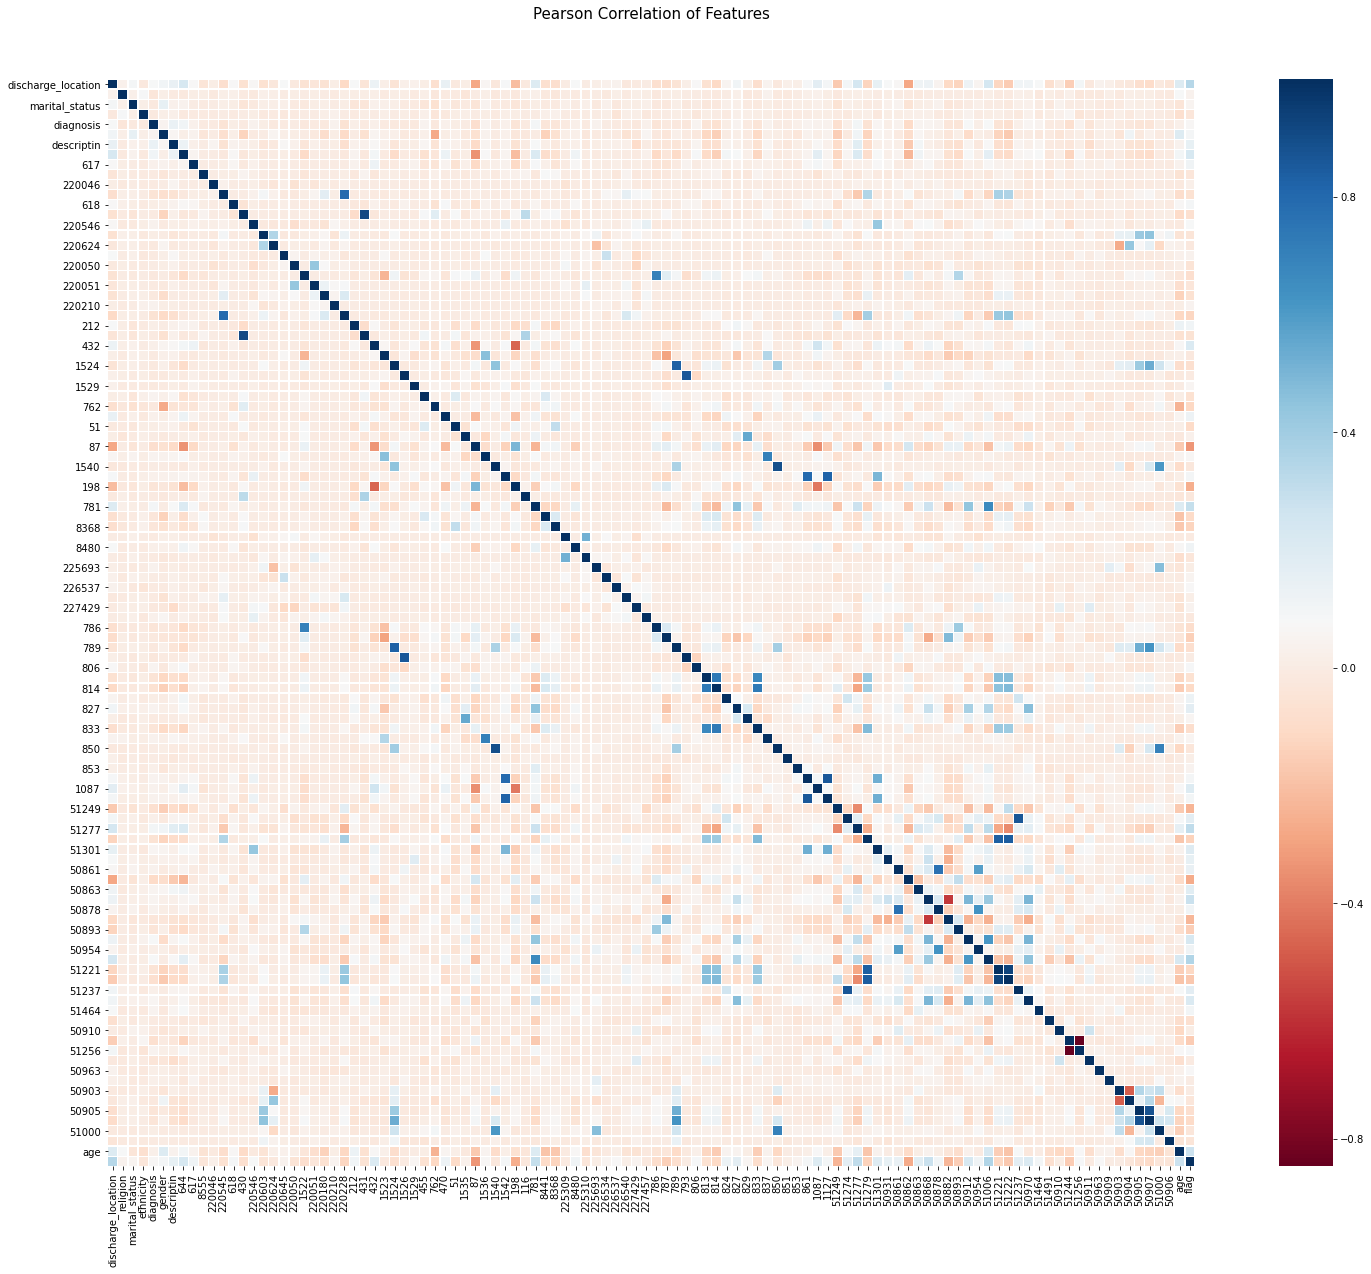

In [165]:
colormap = plt.cm.RdBu # 绘图库中的颜色查找表。比如A1是红色,A2是浅蓝色。 这样一种映射关系
plt.figure(figsize=(30,20))#创建一个新的图表，参数是尺寸，单位为英寸。
plt.title('Pearson Correlation of Features', y=1.05, size=15) #给图表一个标题~~ 
sns.heatmap(data_100_5200_replace.corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=False) #将皮尔森系数值画成图表形式。

In [65]:
data_100_5200_replace.corr()['flag'].to_csv('./flag_digit_score.csv')

In [66]:
data_100_5200_replace.corr().to_csv('./total_100_5200_digit_score.csv')

In [67]:
corr = data_100_5200_replace.corr()
expire_flag = corr['flag'].sort_values(ascending=False)
expire_flag
expire_flag[((expire_flag > 0.1) | (expire_flag < -0.1)) & (expire_flag < 1)]

51006                 0.350336
discharge_location    0.348542
50868                 0.294874
51277                 0.291743
781                   0.289159
age                   0.248234
432                   0.246685
644                   0.231354
50970                 0.225014
51301                 0.219511
50912                 0.215649
50863                 0.184813
51237                 0.167534
51274                 0.165651
50931                 0.163260
50861                 0.154071
descriptin            0.153672
8480                  0.124641
50878                 0.123646
1127                  0.120371
617                   0.117147
51464                 0.113831
212                   0.113540
861                   0.111445
618                   0.103749
51221                -0.107168
814                  -0.113634
51279                -0.132443
51244                -0.152045
787                  -0.153658
51222                -0.162984
50893                -0.167129
51249   

In [69]:
corr_data = data_100_5200_replace[expire_flag[(expire_flag > 0) | (expire_flag < 0)].index]
corr_data.to_csv('./total_100_5200_corr_data.csv')

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
X, y = np.array(corr_data.drop('flag', axis=1)), np.array(corr_data['flag'])

In [72]:
X

array([[ 18.  ,   0.  ,  12.  , ...,   3.4 ,   3.  ,  14.  ],
       [ 24.  ,   1.  ,  13.  , ...,   3.2 ,  15.  ,  18.  ],
       [ 14.  ,   4.  ,  10.  , ...,   2.  ,  15.  ,  15.  ],
       ...,
       [108.  ,   3.  ,  28.  , ...,   4.1 ,  15.  ,  14.  ],
       [ 34.  ,   0.  ,  14.  , ...,   3.5 ,  12.9 ,  14.98],
       [ 17.  ,   1.  ,  13.  , ...,   3.2 ,   9.  ,  13.  ]])

In [73]:
y

array([0., 0., 0., ..., 1., 0., 0.])

In [74]:
X.shape

(5320, 52)

In [75]:
y.shape

(5320,)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666,test_size = 0.33 )

In [77]:
X_train.shape

(3564, 52)

In [78]:
X_test.shape


(1756, 52)

In [79]:
print(type(y_test))
print(y_test)
sum(y_test==1)

<class 'numpy.ndarray'>
[0. 1. 0. ... 0. 0. 0.]


477

In [80]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

StandardScaler()

In [81]:
standard_scaler.mean_

array([2.97917508e+01, 1.92115600e+00, 1.41797250e+01, 1.48657015e+01,
       2.92855836e+01, 7.06043771e+01, 1.34651515e+00, 2.55190797e-01,
       3.61615320e+00, 1.08966835e+01, 1.54249158e+00, 9.81635241e+01,
       1.39099607e+00, 1.48275814e+01, 1.33847803e+02, 7.73285634e+01,
       3.22752525e+01, 1.80016835e-01, 1.26927093e+02, 1.21977946e+01,
       7.29826038e-02, 1.10098204e-01, 1.01309484e+00, 1.21580864e+01,
       1.95148092e+01, 3.97867565e-01, 7.80189001e+01, 3.27144501e+02,
       1.38468446e+02, 4.15600449e+00, 9.26767677e-01, 1.80555556e+00,
       6.50425087e+02, 4.11544893e+01, 8.26599327e-01, 3.20490124e+01,
       5.73697811e+00, 1.15437318e+02, 5.64075898e+01, 3.60001403e+00,
       3.22759259e+01, 1.08968294e+01, 3.61709035e+00, 1.42168519e+01,
       2.40400786e+01, 1.09007295e+01, 8.52300786e+00, 3.37957099e+01,
       2.52473232e+01, 3.20754770e+00, 1.29648148e+01, 1.50154321e+01])

In [82]:
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [83]:
lr = LogisticRegression(C=1,random_state=666)
lr.fit(X_train_standard,y_train)
lr.score(X_test_standard,y_test) # 输出一个正确率

0.8183371298405467

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [184]:
def PolynomialLogisticRegression(degree=2, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

In [ ]:


log_reg_c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {
            'poly__degree': [i for i in range(3, 4)],   
            'log_reg__C': log_reg_c
        }

grid_search = GridSearchCV(PolynomialLogisticRegression(), param_grid)
grid_search.fit(X_train, y_train)

C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_.score(X_test_standard,y_test)

In [185]:
def LogisticRegressionV2(C=1.0):
    return Pipeline([
        ('std', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

In [186]:
log_reg_c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {
            'log_reg__C': log_reg_c
        }
grid_search = GridSearchCV(LogisticRegressionV2(), param_grid)
grid_search.fit(X_train, y_train)

C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [187]:
grid_search.best_score_

0.8035914702581369

In [188]:
grid_search.best_params_

{'log_reg__C': 0.01}

In [189]:
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [190]:
grid_search.best_estimator_.score(X_test_standard,y_test)

0.6879271070615034

In [85]:
lr = LogisticRegression(C=1000,random_state=666)
lr.fit(X_train_standard,y_train)
lr.score(X_test_standard,y_test) # 输出一个正确率

0.8183371298405467

In [86]:
lr = LogisticRegression(C=10,random_state=666)
lr.fit(X_train_standard,y_train)
lr.score(X_test_standard,y_test) # 输出一个正确率

0.8183371298405467

In [87]:
lr = LogisticRegression(C=1,random_state=666)
lr.fit(X_train_standard,y_train)
lr.score(X_test_standard,y_test) # 输出一个正确率

0.8183371298405467

In [88]:
X_test_standard.shape

(1756, 52)

In [89]:
X_train_standard.shape

(3564, 52)

In [90]:
y_test.shape

(1756,)

In [91]:
y_train.shape

(3564,)

In [92]:
X_train_standard.shape

(3564, 52)

In [93]:
X_test_standard.shape

(1756, 52)

In [94]:
X_train_standard

array([[-0.30622307, -0.50639889, -0.29469627, ..., -0.01445016,
        -1.37823022, -1.35201278],
       [-0.66692306, -0.50639889, -0.54449708, ...,  2.28296489,
         0.70746147,  1.33817437],
       [-0.71201056, -1.05614169, -0.7942979 , ...,  0.5599036 ,
         0.70746147,  0.88980985],
       ...,
       [-0.48657306, -1.05614169, -0.54449708, ...,  1.51715987,
         0.70746147, -0.0158865 ],
       [-0.21604807, -1.05614169, -0.29469627, ..., -1.73751145,
        -3.46392191, -1.35201278],
       [ 0.50535193,  0.04334392,  0.20490536, ..., -0.39735267,
        -0.02253062, -0.0158865 ]])

In [95]:
X_train

array([[23.  ,  1.  , 13.  , ...,  3.2 ,  9.  , 12.  ],
       [15.  ,  1.  , 12.  , ...,  4.4 , 15.  , 18.  ],
       [14.  ,  0.  , 11.  , ...,  3.5 , 15.  , 17.  ],
       ...,
       [19.  ,  0.  , 12.  , ...,  4.  , 15.  , 14.98],
       [25.  ,  0.  , 13.  , ...,  2.3 ,  3.  , 12.  ],
       [41.  ,  2.  , 15.  , ...,  3.  , 12.9 , 14.98]])

In [96]:
lr = LogisticRegression()
lr.fit(X_train_standard,y_train)
lr.score(X_test_standard,y_test) # 输出一个正确率

0.8183371298405467

In [97]:
lr.score(X_train_standard, y_train)

0.8409090909090909

In [98]:
log_reg_c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {
            'C': log_reg_c
        }
grid_search = GridSearchCV(LogisticRegression(), param_grid)
grid_search.fit(X_train_standard, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [99]:
grid_search.best_score_

0.832210000472761

In [100]:
grid_search.best_params_

{'C': 0.01}

In [101]:
grid_search.best_estimator_.score(X_test_standard,y_test)

0.8183371298405467

In [102]:
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)
 
grid_search_2 = GridSearchCV(LogisticRegression(), tuned_parameters,cv=5)
grid_search_2.fit(X_train_standard, y_train)

D:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [103]:
grid_search_2.best_score_

0.832210000472761

In [104]:
grid_search_2.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [105]:
grid_search_2.best_estimator_.score(X_test_standard, y_test)

0.8183371298405467

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

In [107]:
#param_grid={'gamma':np.linspace(0, 0.001, 100)}
param_grid = {
    'kernel': ('linear', 'rbf'),
    'C': np.arange(0.5, 1.5, 0.01)
}
grid_search_3 = GridSearchCV(SVC(), param_grid)
grid_search_3.fit(X_train_standard, y_train)

KeyboardInterrupt: 

In [ ]:
grid_search_3.best_score_

In [ ]:
grid_search_3.best_params_

In [ ]:
grid_search_3.best_estimator_.score(X_test_standard, y_test)

In [217]:
param_grid ={
            'criterion':['gini','entropy'],
            'max_depth':np.arange(1, 10, 1)
            }
grid_search_4 = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_search_4.fit(X_train_standard, y_train)

C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [218]:
grid_search_4.best_score_

0.8462401795735129

In [219]:
grid_search_4.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [220]:
grid_search_4.best_estimator_.score(X_test_standard, y_test)

0.8331435079726651

In [221]:
vt_clf = VotingClassifier([
    ('log_clf', grid_search_2.best_estimator_),
    ('svc_clf', SVC(C=1.0400000000000005, kernel='rbf',probability=True)),
    ('dt_clf', grid_search_4.best_estimator_)],
    voting='soft'
)

In [222]:
vt_clf.fit(X_train_standard, y_train)
vt_clf.score(X_test_standard, y_test)

C:\Users\DYJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8428246013667426

In [223]:
grid_search_3.best_estimator_.predict(X_test_standard)

array([1., 1., 0., ..., 0., 0., 0.])

In [224]:
y_test

array([1., 1., 0., ..., 0., 0., 0.])

In [225]:
sum(grid_search_3.best_estimator_.predict(X_test_standard)==y_test) / len(y_test)

0.8006833712984055

In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
clf = AdaBoostClassifier()

In [112]:
clf.fit(X_train_standard, y_train)
clf.score(X_test_standard, y_test)

0.871867881548975

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(penalty='l2')
clf.fit(X_train_standard,y_train)
predictions = clf.predict(X_test_standard)
print("LR")
print(classification_report(y_test,predictions))
print("AC",accuracy_score(y_test,predictions))

LR
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      1279
         1.0       0.74      0.52      0.61       477

    accuracy                           0.82      1756
   macro avg       0.79      0.72      0.74      1756
weighted avg       0.81      0.82      0.81      1756

AC 0.8183371298405467


In [121]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', probability=True)
clf.fit(X_train_standard,y_train)
predictions = clf.predict(X_test_standard)
print("SVM")
print(classification_report(y_test,predictions))
print("AC",accuracy_score(y_test,predictions))

SVM
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      1279
         1.0       0.76      0.52      0.62       477

    accuracy                           0.83      1756
   macro avg       0.80      0.73      0.75      1756
weighted avg       0.82      0.83      0.81      1756

AC 0.8257403189066059


In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf.fit(X_train_standard,y_train)
predictions = clf.predict(X_test_standard)
print("AdaBoost")
print(classification_report(y_test,predictions))
print("AC",accuracy_score(y_test,predictions))

AdaBoost
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      1279
         1.0       0.76      0.52      0.62       477

    accuracy                           0.83      1756
   macro avg       0.80      0.73      0.75      1756
weighted avg       0.82      0.83      0.81      1756

AC 0.8257403189066059


In [123]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200)
clf.fit(X_train_standard,y_train)
predictions = clf.predict(X_test_standard)
print("GBDT")
target_names = ['class 0', 'class 1']
print(classification_report(y_test,predictions,target_names=target_names))
print("AC",accuracy_score(y_test,predictions))

GBDT
              precision    recall  f1-score   support

     class 0       0.87      0.97      0.92      1279
     class 1       0.90      0.63      0.74       477

    accuracy                           0.88      1756
   macro avg       0.89      0.80      0.83      1756
weighted avg       0.88      0.88      0.87      1756

AC 0.8792710706150342


In [124]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_standard,y_train)
predictions = clf.predict(X_test_standard)
print("GaussianNB")
print(classification_report(y_test,predictions))
print("AC",accuracy_score(y_test,predictions))

GaussianNB
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1279
         1.0       0.66      0.57      0.61       477

    accuracy                           0.80      1756
   macro avg       0.76      0.73      0.74      1756
weighted avg       0.80      0.80      0.80      1756

AC 0.8046697038724373


In [125]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_standard,y_train)
predictions = clf.predict(X_test_standard)
print("DT")
print(classification_report(y_test,predictions))
print("AC",accuracy_score(y_test,predictions))

DT
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      1279
         1.0       0.68      0.65      0.66       477

    accuracy                           0.82      1756
   macro avg       0.77      0.77      0.77      1756
weighted avg       0.82      0.82      0.82      1756

AC 0.820615034168565


In [126]:
import xgboost
from sklearn.naive_bayes import MultinomialNB
clf = xgboost.XGBClassifier()
clf.fit(X_train_standard,y_train)
predictions = clf.predict(X_test_standard)
print("xgboost")
print(classification_report(y_test,predictions))
print("AC",accuracy_score(y_test,predictions))

ModuleNotFoundError: No module named 'xgboost'

In [131]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
#import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
clf1 = GradientBoostingClassifier(n_estimators=200)
clf2 = RandomForestClassifier(random_state=0, n_estimators=500)
clf3 = LogisticRegression(random_state=1)
clf4 = GaussianNB()
#clf5 = xgboost.XGBClassifier()
clf = VotingClassifier(estimators=[
    ('gbdt',clf1),
    #('rf',clf2),
    #('lr',clf3),
    #('nb',clf4),
    ],
    voting='soft')
clf.fit(X_train_standard,y_train)
predictions = clf.predict(X_test_standard)
print("voting_classify")
print(classification_report(y_test,predictions))
print("AC",accuracy_score(y_test,predictions))

voting_classify
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      1279
         1.0       0.89      0.63      0.74       477

    accuracy                           0.88      1756
   macro avg       0.88      0.80      0.83      1756
weighted avg       0.88      0.88      0.87      1756

AC 0.8787015945330297
